In [2]:
#Import required library
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

API_KEY = "LgDn4dbsxQ24AscVnheZjjKZzayLyTvvnW3PuhUG"
url = f"https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos?sol=1000&camera=fhaz&api_key={API_KEY}"

In [8]:
def fetch_mars_rover_images(rover="curiosity", sol=1000, camera="fhaz", api_key=API_KEY):
    data = requests.get(url).json() # fetch list of all available rovers
    
    if "photos" not in data or not data["photos"]:
        print("No photos found. Try a different sol or camera.")
        return None
    
    print(f"Found {len(data['photos'])} images from {rover.upper()} rover (Sol {sol}, Camera: {camera.upper()})")
    return data["photos"]

In [6]:
def display_images(photos, max_images=3):
    """Display the first few images using matplotlib."""
    if not photos:
        return

    for i, photo in enumerate(photos[:max_images]):
        img_url = photo["img_src"]
        response = requests.get(img_url)
        img = Image.open(BytesIO(response.content))

        plt.figure(figsize=(10, 6))
        plt.imshow(img)
        plt.title(f"Sol {photo['sol']} | Camera: {photo['camera']['full_name']}")
        plt.axis('off')
        plt.show()

Found 2 images from CURIOSITY rover (Sol 1000, Camera: FHAZ)


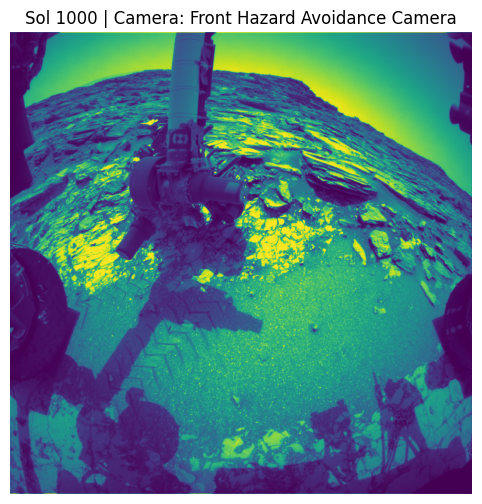

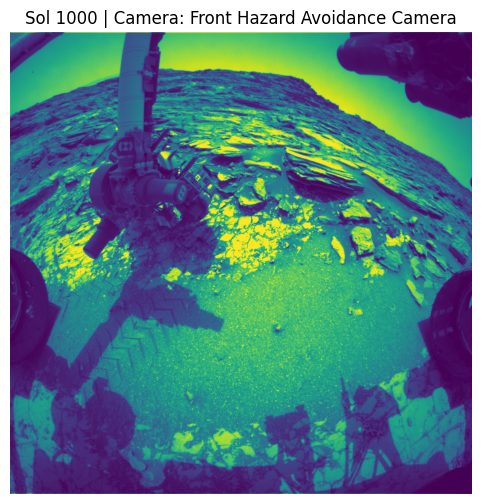

In [9]:
#Fetch and display MArs Rover images
rover = "curiosity" #there are other options as well
sol = 1000          #Martian day(1 sol == 1 Earth day)
camera = "fhaz"     #Camera code (e.g, "fhaz", "rhaz", "mast", "navcam")

photos = fetch_mars_rover_images(rover, sol, camera)
if photos:
    display_images(photos)

Found 2 images from  PERSEVERANCE rover (Sol 1000, Camera: RHAZ)


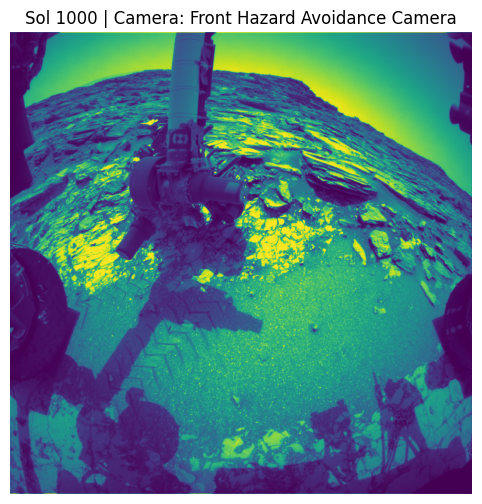

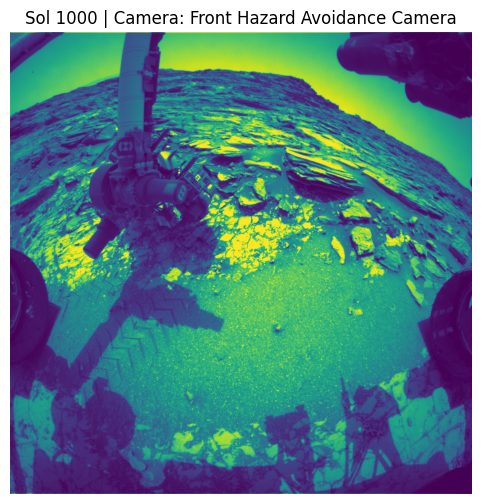

In [10]:
#Fetch and display MArs Rover images
rover = " perseverance" #Options: curiosity, perseverance, opportunity, spirit
sol = 1000          #Martian day(1 sol == 1 Earth day)
camera = "rhaz"     #Camera code (e.g, "fhaz", "rhaz", "mast", "navcam")

photos = fetch_mars_rover_images(rover, sol, camera)
if photos:
    display_images(photos)